In [8]:
%matplotlib inline
import os
from matplotlib import style
stylepath = os.path.join('darkthemefivethirtyeight.mplstyle')
plt.style.use(stylepath)
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
# create engine to hawaii.sqlite
path = os.path.join('Resources', 'hawaii.sqlite')
engine = create_engine(f"sqlite:///{path}")

In [12]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with=engine)

In [13]:
# View all of the classes that automap found
base.classes.keys()

['station', 'measurement']

In [14]:
# Save references to each table
measurements = base.classes.measurement
stations = base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
recentdate = session.query(func.max(measurements.date)).first()
recentdate

('2017-08-23',)

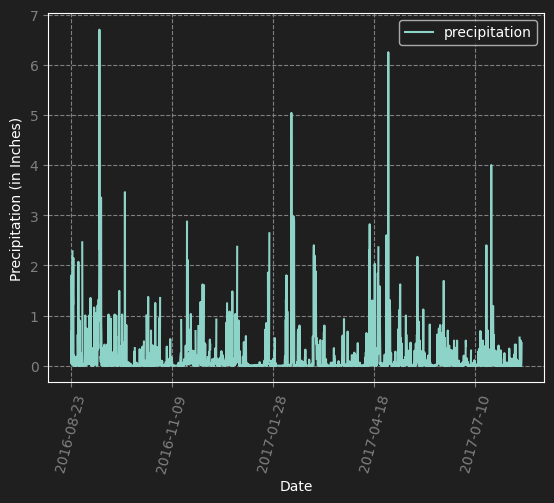

In [55]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recentdatestr = recentdate[0]
# 2016 was a leap year
previousYear = (dt.datetime.strptime(recentdatestr, '%Y-%m-%d') - dt.timedelta(days=366)).replace(year=(dt.datetime.strptime(recentdatestr, '%Y-%m-%d')).year - 1)
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurements.date, measurements.prcp).filter(measurements.date >= previousYear).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results = pd.DataFrame(results, columns=['date', 'precipitation'])


# Sort the dataframe by date
results = results.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
results.plot(x='date', y='precipitation', rot=75)
plt.xlabel('Date')
plt.ylabel('Precipitation (in Inches)')
plt.grid(True, linestyle='--')
plt.show()

In [39]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = results.describe()
summary 

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [57]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(stations.station)).all()

[(9,)]

In [45]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurements.station, func.count(measurements.station)). group_by(measurements.station).order_by(func.count(measurements.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurements.tobs), func.max(measurements.tobs), func.avg(measurements.tobs)).filter(measurements.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 23.52222222222222, 'Temperature Observed')

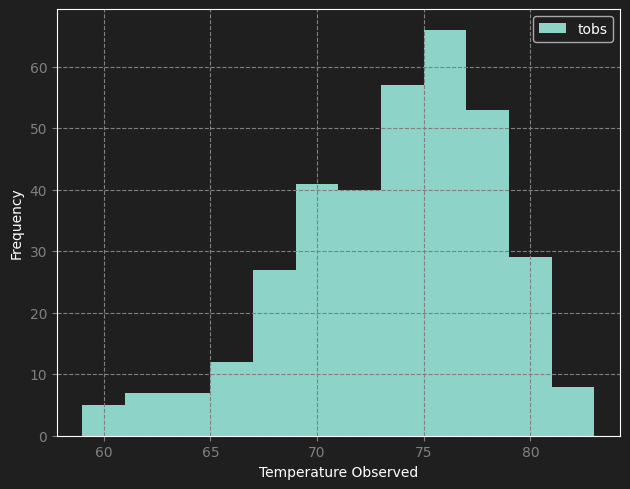

In [54]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurements.tobs).filter(measurements.station == 'USC00519281').filter(measurements.date >= previousYear).all()

resultsDF = pd.DataFrame(results, columns=['tobs'])
resultsDF

# Plotting

resultsDF.plot.hist(bins=12)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.xlabel('Temperature Observed')

# Close Session

In [56]:
# Close Session
session.close()